In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools

%matplotlib inline

# 8.2.1

In [97]:
### Kernel function generators
def linear_kernel(W, X):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
    Returns:
        matrix of size n1xn2, with w_i^T x_j in position i,j
    """
    return np.dot(W,np.transpose(X))
 
def RBF_kernel(W,X,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||w_i-x_j||^2/(2 sigma^2)) in position i,j
    """
    #TODO
    return np.exp((-1)*scipy.spatial.distance.cdist(W,X,'sqeuclidean')/(2*sigma**2))
    

def polynomial_kernel(W, X, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <w_i,x_j>)^degree in position i,j
    """
    #TODO
    return (np.dot(W,np.transpose(X)) + offset)**degree
    


# 8.2.2

In [122]:
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)
linear_kernel(prototypes,prototypes)

array([[16,  4,  0, -8],
       [ 4,  1,  0, -2],
       [ 0,  0,  0,  0],
       [-8, -2,  0,  4]])

# 8.2.3

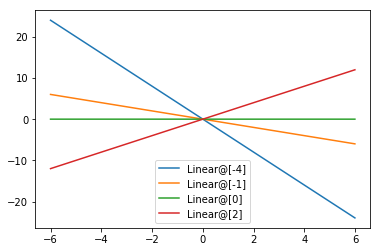

In [120]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 
 

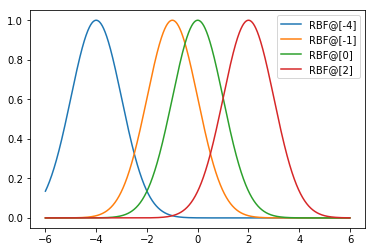

In [123]:
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = RBF_kernel(prototypes, xpts, 1) 
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

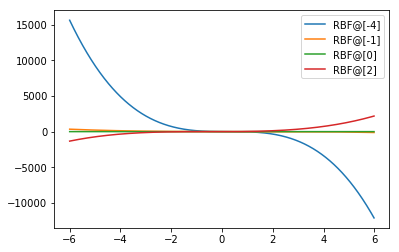

In [124]:
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = polynomial_kernel(prototypes, xpts,1,3) 
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

# 8.2.4

In [101]:
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        """
        Args:
            kernel(W,X) - a function return the cross-kernel matrix between rows of W and rows of X for kernel k
            prototype_points - an Rxd matrix with rows mu_1,...,mu_R
            weights - a vector of length R
        """

        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R w_i k(x_j, mu_i)
        """
        # TODO
        return np.dot(self.kernel(X,self.prototype_points),self.weights)

In [102]:
from functools import partial
proto_ptr = np.array([-1, 0, 1]).reshape(-1,1)
weights = np.array([1, -1, 1]).reshape(-1,1)

kernel = partial(RBF_kernel,sigma=1)
RBF_model = Kernel_Machine(kernel, proto_ptr, weights)

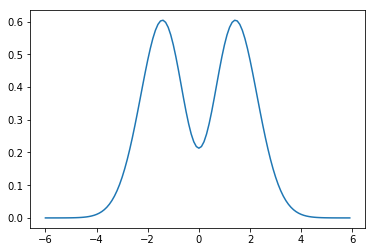

In [103]:
plot_step = 0.1
pts = np.arange(-6.0, 6.0, plot_step).reshape(-1,1)
plt.plot(pts, RBF_model.predict(pts))
plt.show()

Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

In [104]:
import os
os.chdir("C:\Spring_2017\machine_learning\homework\hw4")
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

# 8.3.1

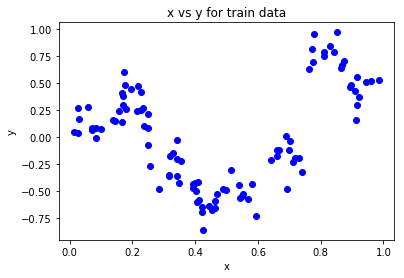

In [105]:
plt.plot(x_train,y_train,'bo')
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y for train data")
plt.show()

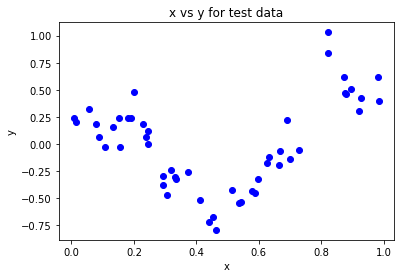

In [106]:
plt.plot(x_test,y_test,'bo')
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y for test data")
plt.show()

# 8.3.2

In [107]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    # TODO
    from numpy.linalg import inv
    K = kernel(X,X)
    alpha = np.dot((inv(l2reg*np.identity(K.shape[0])+ K)), y)
    return Kernel_Machine(kernel, X, alpha)

# 8.3.3

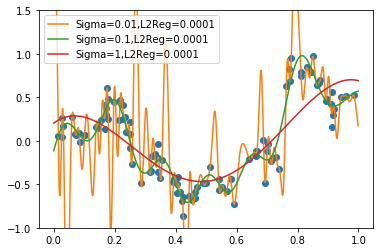

In [108]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

>When sigma = 0.1, the model fits the best, when sigma=0.01, the model seems like overfit, when sigma=1 the model have large bias and small variace

# 8.3.4

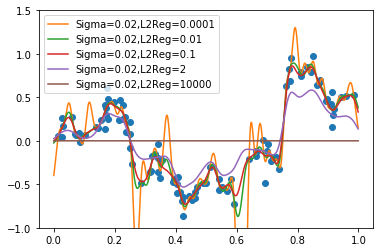

In [109]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2,10000]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

>When L2Reg is 0.0001, the model is overfitting. when L2Reg is infinite, the all coefficient is close to 0 and the prediction is almost 0. When  L2Reg = 2, it seems the model fits the best.

# 8.3.5

In [110]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return((self.predict(X)-y).mean()) 

In [111]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [112]:
param_grid = [{'kernel': ['RBF'],'sigma':np.arange(0.001,0.2,0.001), 'l2reg': np.exp2(-np.arange(0.8,1.4,0.001))}]
              #{'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              #{'kernel':['linear'],'l2reg': [10,1,.01]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['RBF'], 'sigma': array([ 0.001,  0.002, ...,  0.198,  0.199]), 'l2reg': array([ 0.57435,  0.57395, ...,  0.37945,  0.37919])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [113]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
#cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
#        "mean_test_score","mean_train_score"]
cols_to_keep = ["param_kernel","param_l2reg" ,"param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_kernel,param_l2reg,param_sigma,mean_test_score,mean_train_score
119251,RBF,0.379192,0.051,0.013862,0.014357
119052,RBF,0.379455,0.051,0.013863,0.014359
118853,RBF,0.379718,0.051,0.013863,0.014360
118654,RBF,0.379981,0.051,0.013863,0.014362
118455,RBF,0.380245,0.051,0.013863,0.014364
118256,RBF,0.380508,0.051,0.013863,0.014365
118057,RBF,0.380772,0.051,0.013863,0.014367
117858,RBF,0.381036,0.051,0.013863,0.014369
117659,RBF,0.381300,0.051,0.013863,0.014370
119252,RBF,0.379192,0.052,0.013863,0.014540


In [95]:
param_grid = [{'kernel':['polynomial'],'offset':np.arange(-20,20,1), 'degree':[4,5,6,7,8],'l2reg':np.arange(0.001,0.5,0.001) }]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['polynomial'], 'offset': array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
         6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19]), 'degree': [4, 5, 6, 7, 8], 'l2reg': array([ 0.001,  0.002, ...,  0.498,  0.499])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [76]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,mean_test_score,mean_train_score
3004,5,polynomial,0.002,1,3.230212e-02,4.694382e-02
3010,5,polynomial,0.003,1,3.236805e-02,5.017341e-02
6245,6,polynomial,0.043,2,3.241265e-02,4.840063e-02
6239,6,polynomial,0.042,2,3.241395e-02,4.821574e-02
6251,6,polynomial,0.044,2,3.241529e-02,4.858547e-02
6233,6,polynomial,0.041,2,3.241939e-02,4.803089e-02
6257,6,polynomial,0.045,2,3.242170e-02,4.877021e-02
6227,6,polynomial,0.040,2,3.242916e-02,4.784614e-02
6263,6,polynomial,0.046,2,3.243170e-02,4.895479e-02
6221,6,polynomial,0.039,2,3.244348e-02,4.766157e-02


In [89]:
param_grid = [{'kernel':['linear'],'l2reg': np.arange(3.6,4.2,0.001)}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'l2reg': array([ 3.6  ,  3.601, ...,  4.199,  4.2  ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [90]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_kernel","param_l2reg" ,"mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_kernel,param_l2reg,mean_test_score,mean_train_score
306,linear,3.906,0.16451,0.206560
305,linear,3.905,0.16451,0.206560
307,linear,3.907,0.16451,0.206560
304,linear,3.904,0.16451,0.206560
308,linear,3.908,0.16451,0.206560
303,linear,3.903,0.16451,0.206560
309,linear,3.909,0.16451,0.206560
302,linear,3.902,0.16451,0.206560
310,linear,3.910,0.16451,0.206560
301,linear,3.901,0.16451,0.206560


>From the 3 tables above , we can see find that sigma=0.051, l2reg=0.379 is the best for RBF, mean_test_score is 0.0138, for polynomial kernel  offset=1 degree=5 l2reg=0.002, mean_test_score is 0.0323 and l2reg=3.906 is the best for linear kernel, mean_test_score is 0.16. RBF performs best.

>From the chart above we can clearly see that, the first line is the best parameter selection case, when changing one to two parameters, the prediction performance fall. For example, for polynomial kernel, when change l2reg from 0.002 to 0.003, the mean test score fall.

# 8.3.6

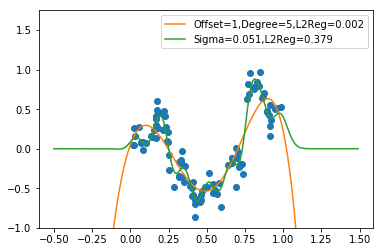

In [116]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= 1
degree = 5
l2reg = 0.002
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 0.051
l2reg= 0.379
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

>From the Plot we can see that RBF fit the model better. But it might overfit.

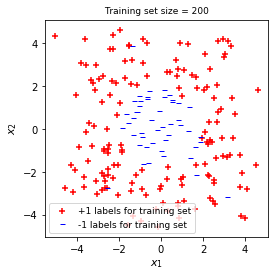

In [117]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

# 8.3.7

Bayes Decision Function is  

$$f^*(x) = E(y|x) $$
$$= E((f(x)+\epsilon)|x) $$
$$= E(f(x)|x) + E(\epsilon|x)$$
$$= f(x)$$

The Bayes Risk for Loss function is
$$E[l(\hat y - y)] $$
$$= E((\hat y - y)^2)$$
$$ = E((f(x)-f(x)-\epsilon)^2)$$
$$ = E(\epsilon^2)$$
$$ = 0+variance(\epsilon)$$
$$ = 0.1$$

# 8.3.8

# 8.3.9

# 8.4